<a href="https://colab.research.google.com/github/fikramulla/itu-5g-2020/blob/main/itu_RLF_v3_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ITU Aclara Power Pros Team - Radio Link Failure

#####Faiz Ikramulla (fikramulla@hubbell.com ; fikramulla@aclara.com)
#####Dhruv Gaonkar (dgaonkar@hubbell.com ; dgaonkar@aclara.com)
#####Jeff Anderson (jmanderson@hubbell.com)
#####Aaron Hoock (ahoock@hubbell.com)


In [ ]:
# code starts here

In [ ]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import io 
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

# df2 = pd.read_csv(io.BytesIO(uploaded['turkcell_orig_1.csv']))

Saving turkcell_orig_1.csv to turkcell_orig_1.csv


In [ ]:
df2 = pd.read_csv('turkcell_orig_1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df2)

        Unnamed: 0 type         datetime  ... capacity  modulation    rlf
0             1114  ENK    1/2/2019 0:00  ...      200      512QAM  False
1             1115  ENK    1/2/2019 0:00  ...      417  512QAM(QO)  False
2             1116  ENK    1/2/2019 0:00  ...      406      512QAM  False
3             1117  ENK    1/2/2019 0:00  ...      200      512QAM  False
4             1118  NEC    1/2/2019 0:00  ...      257      512QAM  False
...            ...  ...              ...  ...      ...         ...    ...
180305      181419  ENK  12/31/2019 0:00  ...      203      512QAM  False
180306      181420  NEC  12/31/2019 0:00  ...      318      128QAM  False
180307      181421  NEC  12/31/2019 0:00  ...      407      512QAM  False
180308      181422  NEC  12/31/2019 0:00  ...      407      512QAM  False
180309      181423  NEC  12/31/2019 0:00  ...      495     2048QAM  False

[180310 rows x 25 columns]


In [ ]:
n = len(pd.unique(df2['rlf'])) 
n

2

In [ ]:
df2.shape

(180310, 25)

In [ ]:
(pd.unique(df2['modulation']))

array(['512QAM', '512QAM(QO)', '2048QAM*', '128QAM', '1024 QAM', '16QAM',
       '256QAM(Q)', '256QAM', '2048QAM', '64QAM', '128QAM(Q)', 'C-QPSK',
       '1024QAM'], dtype=object)

In [ ]:
len((pd.unique(df2['modulation'])))

13

In [ ]:
(pd.unique(df2['capacity']))

array([200, 417, 406, 257, 495, 158, 327, 154, 456,  72,  91, 109, 407,
        88,  94,  70, 203,  84, 180, 247,  95, 182, 325, 160,  77, 140,
        92,  81, 281,  99,  97, 187,  74, 364, 225,  87,  73, 447, 285,
       318,   8, 345, 371, 369, 189, 272])

In [ ]:
(np.mean(df2['capacity']))

262.47616327436083

In [ ]:
(np.mean(df2['rxlevmax']))

-39.93849814207724

In [ ]:
(np.max(df2['rxlevmax']))

0.0

In [ ]:
(np.min(df2['rxlevmax']))

-99.9

In [ ]:
(np.std(df2['rxlevmax']))

8.32686875618339

In [ ]:
# sort data by each modulation type - create dataframe for each type

In [ ]:
# sample linear regresssion model for rxlevmax as x, rlf as y

In [ ]:
# actually we are predicting T or F, so linear is not good option. will review binary classification models.

In [ ]:
df3 = pd.get_dummies(df2, columns=['rlf'])

In [ ]:
df3

,Unnamed: 0,type,datetime,tip,mlid,mw_connection_no,site_no,site_id,neid,direction,polarization,card_type,adaptive_modulation,freq_band,link_length,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,scalibility_score,capacity,modulation,rlf_False,rlf_True
0,1114,ENK,1/2/2019 0:00,NEAR,K7JW,198755,17438,RL_SKG?K,8713.0,Near End,NaN,cardtype1,Enable,f3,NaN,0,0,0,86400,0,-39.5,0,200,512QAM,1,0
1,1115,ENK,1/2/2019 0:00,NEAR,K7CX,242760,5006,RL_SKLGO,NaN,NaN,NaN,cardtype1,Enable,f3,NaN,0,0,0,86400,0,-44.2,NaN,417,512QAM(QO),1,0
2,1116,ENK,1/2/2019 0:00,NEAR,K7WG,163457,60081,RL_L?EKP,5159.0,Near End,NaN,cardtype4,Enable,f3,NaN,0,0,0,86400,0,-39.8,0,406,512QAM,1,0
3,1117,ENK,1/2/2019 0:00,FAR,K7DZ,149188,10924,RL_[EMCB,NaN,NaN,NaN,cardtype1,Enable,f2,NaN,0,36,0,36900,81,-40.1,NaN,200,512QAM,1,0
4,1118,NEC,1/2/2019 0:00,FAR,K7QE,325083,10936,RL_SKTKB,NaN,NaN,NaN,cardtype5,Enable,f5,NaN,0,0,0,86400,0,-32.8,NaN,257,512QAM,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180305,181419,ENK,12/31/2019 0:00,FAR,K3LE,1380331,88604,RL_IOQMI,5224.0,Near End,Vertical,cardtype4,Enable,f2,12418.0,0,0,0,86400,0,-47.6,0,203,512QAM,1,0
180306,181420,NEC,12/31/2019 0:00,FAR,K7LP,1361669,87029,RL_L?WCO,NaN,NaN,Vertical,cardtype5,Enable,f4,1032.0,0,0,0,86400,0,-41.0,NaN,318,128QAM,1,0
180307,181421,NEC,12/31/2019 0:00,FAR,K3XZ,1367838,23726,RL_SETIJ,NaN,NaN,Horizontal,cardtype5,Enable,f3,9384.0,0,0,0,86400,0,-45.5,NaN,407,512QAM,1,0
180308,181422,NEC,12/31/2019 0:00,NEAR,K3CG,1373580,84910,RL_SKUSO,NaN,NaN,Horizontal,cardtype5,Enable,f4,1963.0,0,0,0,86400,0,-28.4,NaN,407,512QAM,1,0


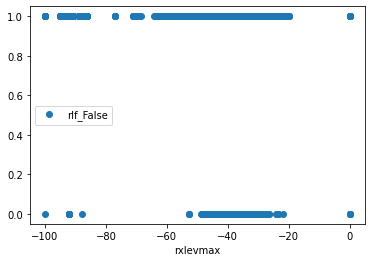

In [ ]:
df3.plot(x='rxlevmax', y='rlf_False', style='o')
#plt.title('Hours vs Percentage')
#plt.xlabel('Hours Studied')
#plt.ylabel('Percentage Score')
plt.show()

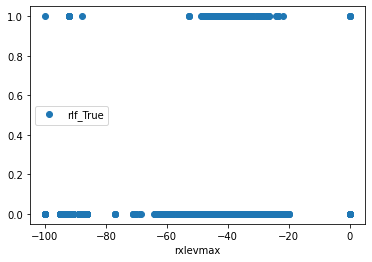

In [ ]:
df3.plot(x='rxlevmax', y='rlf_True', style='o')
#plt.title('Hours vs Percentage')
#plt.xlabel('Hours Studied')
#plt.ylabel('Percentage Score')
plt.show()

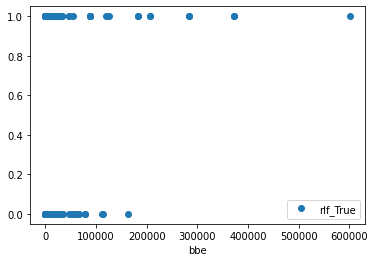

In [ ]:
df3.plot(x='bbe', y='rlf_True', style='o')

In [ ]:
f =df3['rlf_True'].sum()
f

611

In [ ]:
p = df3['rlf_False'].sum()
p

179699

In [ ]:
f/(f+p)*100

0.33886085075702954

In [ ]:
# subset to failed data set (611 rows) - and check for correlations 

In [ ]:
test = df3[df3["rlf_True"] >= 1]

In [ ]:
test

,Unnamed: 0,type,datetime,tip,mlid,mw_connection_no,site_no,site_id,neid,direction,polarization,card_type,adaptive_modulation,freq_band,link_length,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,scalibility_score,capacity,modulation,rlf_False,rlf_True
536,1650,ENK,1/2/2019 0:00,NEAR,K3DA,310109,61602,RL_JEC?P,NaN,NaN,NaN,cardtype2,Disable,f3,NaN,1,79,3158,83242,4691,-39.8,NaN,91,16QAM,0,1
554,1668,ENK,1/3/2019 0:00,FAR,K7AJ,306647,99127,RL_IASMP,NaN,NaN,NaN,cardtype2,Disable,f3,NaN,2,10,433,85967,834,-39.5,NaN,154,128QAM,0,1
590,1704,ENK,1/3/2019 0:00,NEAR,K3VD,161506,88940,RL_O;SB>,NaN,NaN,NaN,cardtype2,Enable,f3,NaN,0,18,193,86207,1680,-48.2,NaN,95,16QAM,0,1
646,1760,ENK,1/3/2019 0:00,FAR,J9YZ,280856,18235,RL_[ELER,5059.0,Near End,NaN,cardtype4,Enable,f3,NaN,0,2,129,86271,219,-41.0,0,154,128QAM,0,1
1000,2114,ENK,1/3/2019 0:00,FAR,K7BM,310098,40658,RL_L?E?H,NaN,NaN,NaN,cardtype2,Enable,f3,NaN,0,10,161,86239,392,-45.7,NaN,154,128QAM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175966,177080,NEC,12/24/2019 0:00,FAR,K7DC,1366646,80156,RL_SKTEO,NaN,NaN,Horizontal,cardtype5,Enable,f3,6638.0,1,8,166,86400,369,-42.5,NaN,158,128QAM,0,1
175973,177087,NEC,12/24/2019 0:00,NEAR,K7CD,1366646,62702,RL_[MEQ1,NaN,NaN,Horizontal,cardtype5,Enable,f3,6638.0,10,17,190,86400,545,-41.7,NaN,158,128QAM,0,1
177671,178785,NEC,12/27/2019 0:00,FAR,K7IC,328406,29095,RL_[7IR@,NaN,NaN,Vertical,cardtype5,Enable,f4,471.0,0,1,63768,86400,788,-26.9,NaN,318,128QAM,0,1
178867,179981,ENK,12/29/2019 0:00,FAR,K7SX,294771,10936,RL_SKTKB,NaN,NaN,Vertical,cardtype2,Disable,f5,208.0,0,1,7581,78819,177,-92.2,NaN,154,128QAM,0,1


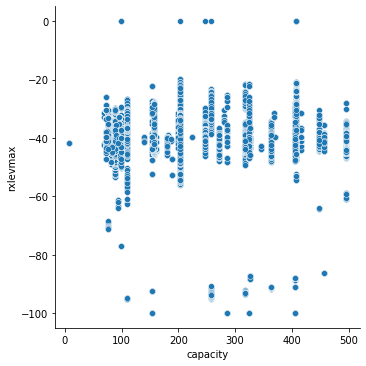

In [ ]:
#tips = sns.load_dataset("df3")
sns.relplot(x="capacity", y="rxlevmax", data=df3);

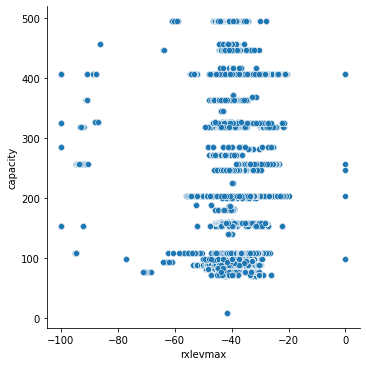

In [ ]:
sns.relplot(x="rxlevmax", y="capacity", data=df3);

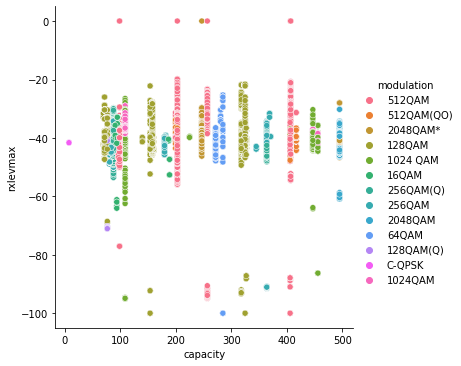

In [ ]:
sns.relplot(x="capacity", y="rxlevmax", hue="modulation", data=df3);

In [ ]:
df4 = pd.get_dummies(df3, columns=['card_type'])
df5 = pd.get_dummies(df4, columns=['adaptive_modulation'])
df6 = pd.get_dummies(df5, columns=['freq_band'])
df7 = pd.get_dummies(df6, columns=['modulation'])



In [ ]:
df7

,Unnamed: 0,type,datetime,tip,mlid,mw_connection_no,site_no,site_id,neid,direction,polarization,link_length,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,scalibility_score,capacity,rlf_False,rlf_True,card_type_cardtype1,card_type_cardtype2,card_type_cardtype3,card_type_cardtype4,card_type_cardtype5,adaptive_modulation_Disable,adaptive_modulation_Enable,freq_band_f1,freq_band_f2,freq_band_f3,freq_band_f4,freq_band_f5,modulation_1024 QAM,modulation_1024QAM,modulation_128QAM,modulation_128QAM(Q),modulation_16QAM,modulation_2048QAM,modulation_2048QAM*,modulation_256QAM,modulation_256QAM(Q),modulation_512QAM,modulation_512QAM(QO),modulation_64QAM,modulation_C-QPSK
0,1114,ENK,1/2/2019 0:00,NEAR,K7JW,198755,17438,RL_SKG?K,8713.0,Near End,NaN,NaN,0,0,0,86400,0,-39.5,0,200,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1115,ENK,1/2/2019 0:00,NEAR,K7CX,242760,5006,RL_SKLGO,NaN,NaN,NaN,NaN,0,0,0,86400,0,-44.2,NaN,417,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1116,ENK,1/2/2019 0:00,NEAR,K7WG,163457,60081,RL_L?EKP,5159.0,Near End,NaN,NaN,0,0,0,86400,0,-39.8,0,406,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1117,ENK,1/2/2019 0:00,FAR,K7DZ,149188,10924,RL_[EMCB,NaN,NaN,NaN,NaN,0,36,0,36900,81,-40.1,NaN,200,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1118,NEC,1/2/2019 0:00,FAR,K7QE,325083,10936,RL_SKTKB,NaN,NaN,NaN,NaN,0,0,0,86400,0,-32.8,NaN,257,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180305,181419,ENK,12/31/2019 0:00,FAR,K3LE,1380331,88604,RL_IOQMI,5224.0,Near End,Vertical,12418.0,0,0,0,86400,0,-47.6,0,203,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
180306,181420,NEC,12/31/2019 0:00,FAR,K7LP,1361669,87029,RL_L?WCO,NaN,NaN,Vertical,1032.0,0,0,0,86400,0,-41.0,NaN,318,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
180307,181421,NEC,12/31/2019 0:00,FAR,K3XZ,1367838,23726,RL_SETIJ,NaN,NaN,Horizontal,9384.0,0,0,0,86400,0,-45.5,NaN,407,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
180308,181422,NEC,12/31/2019 0:00,NEAR,K3CG,1373580,84910,RL_SKUSO,NaN,NaN,Horizontal,1963.0,0,0,0,86400,0,-28.4,NaN,407,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# create new df
df8 = df7.drop(['Unnamed: 0','site_id','site_no','type','datetime','scalibility_score','tip','mlid','mw_connection_no','neid','direction','polarization','link_length','severaly_error_second','error_second'], axis = 1)


In [ ]:
# df9 = df8.drop(df8.columns[1], axis = 1, inplace = True)

In [ ]:
list(df8.columns) 


['unavail_second',
 'avail_time',
 'bbe',
 'rxlevmax',
 'capacity',
 'rlf_False',
 'rlf_True',
 'card_type_cardtype1',
 'card_type_cardtype2',
 'card_type_cardtype3',
 'card_type_cardtype4',
 'card_type_cardtype5',
 'adaptive_modulation_Disable',
 'adaptive_modulation_Enable',
 'freq_band_f1',
 'freq_band_f2',
 'freq_band_f3',
 'freq_band_f4',
 'freq_band_f5',
 'modulation_1024 QAM',
 'modulation_1024QAM',
 'modulation_128QAM',
 'modulation_128QAM(Q)',
 'modulation_16QAM',
 'modulation_2048QAM',
 'modulation_2048QAM*',
 'modulation_256QAM',
 'modulation_256QAM(Q)',
 'modulation_512QAM',
 'modulation_512QAM(QO)',
 'modulation_64QAM',
 'modulation_C-QPSK']

In [ ]:
y = df8.iloc[:, 5]
y

0         1
1         1
2         1
3         1
4         1
         ..
180305    1
180306    1
180307    1
180308    1
180309    1
Name: rlf_False, Length: 180310, dtype: uint8

In [ ]:
X = df8.drop(['rlf_True','rlf_False'], axis = 1)
X

,unavail_second,avail_time,bbe,rxlevmax,capacity,card_type_cardtype1,card_type_cardtype2,card_type_cardtype3,card_type_cardtype4,card_type_cardtype5,adaptive_modulation_Disable,adaptive_modulation_Enable,freq_band_f1,freq_band_f2,freq_band_f3,freq_band_f4,freq_band_f5,modulation_1024 QAM,modulation_1024QAM,modulation_128QAM,modulation_128QAM(Q),modulation_16QAM,modulation_2048QAM,modulation_2048QAM*,modulation_256QAM,modulation_256QAM(Q),modulation_512QAM,modulation_512QAM(QO),modulation_64QAM,modulation_C-QPSK
0,0,86400,0,-39.5,200,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,86400,0,-44.2,417,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,86400,0,-39.8,406,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,36900,81,-40.1,200,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,86400,0,-32.8,257,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180305,0,86400,0,-47.6,203,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
180306,0,86400,0,-41.0,318,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
180307,0,86400,0,-45.5,407,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
180308,0,86400,0,-28.4,407,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# try a SVM model (as per exammpleb)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,unavail_second,avail_time,bbe,rxlevmax,capacity,card_type_cardtype1,card_type_cardtype2,card_type_cardtype3,card_type_cardtype4,card_type_cardtype5,adaptive_modulation_Disable,adaptive_modulation_Enable,freq_band_f1,freq_band_f2,freq_band_f3,freq_band_f4,freq_band_f5,modulation_1024 QAM,modulation_1024QAM,modulation_128QAM,modulation_128QAM(Q),modulation_16QAM,modulation_2048QAM,modulation_2048QAM*,modulation_256QAM,modulation_256QAM(Q),modulation_512QAM,modulation_512QAM(QO),modulation_64QAM,modulation_C-QPSK
95242,0,86400,0,-44.8,84,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
64635,0,86400,0,-39.8,91,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
23969,0,86400,0,-39.4,247,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
132223,0,86400,0,-32.1,203,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
108796,0,86400,0,-42.3,325,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,0,86400,0,-39.5,91,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
176963,0,86400,0,-29.7,406,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
117952,0,86400,0,-23.3,257,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
173685,0,86400,0,-33.2,203,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X = X_train
Y = y_train


TypeError: ignored

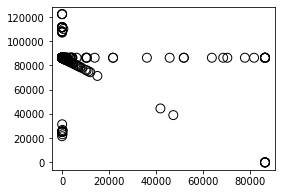

In [ ]:
fignum = 1

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['blue', 'blue', 'blue'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

In [ ]:
# prediction

In [ ]:
pred = svc.predict(X_test)

In [ ]:
#confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

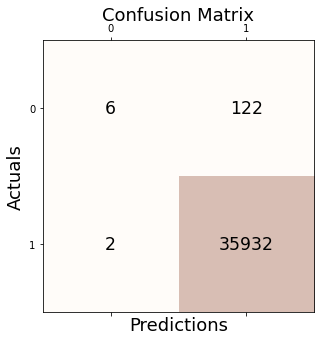

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# metrics
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.997
Recall: 1.000
Accuracy: 0.997
F1 Score: 0.998


In [ ]:
# ok, now we should try to get better F1 score... 
# 99.7 means no better that assuming everying thing is rlf_False (i.e. no failure) since failure rate in data set was ~0.33%.
#we should add back some weather data and distance data since that is the point of the challenge - to use weather as factor to predict.


In [ ]:
# can also do various organization, structuing, transofrmations on the existing numerical value datab